In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [19]:
import kagglehub
import os

# Download dataset (default location: ~/.cache/kagglehub/datasets/)
dataset_path = kagglehub.dataset_download("atreyamajumdar/mstar-dataset-8-classes")

# Print the dataset path
print("✅ Dataset downloaded to:", dataset_path)

# Check if "versions/1" is already in the detected path
if "versions" in dataset_path:
    DATASET_PATH = os.path.join(dataset_path, "Padded_imgs")  # Avoid duplicate "versions/1"
else:
    DATASET_PATH = os.path.join(dataset_path, "versions", "1", "Padded_imgs")

# Verify dataset path
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"❌ Dataset path does not exist: {DATASET_PATH}")

print(f"✅ Dataset path dynamically detected: {DATASET_PATH}")


✅ Dataset downloaded to: C:\Users\hp omen 4 pro\.cache\kagglehub\datasets\atreyamajumdar\mstar-dataset-8-classes\versions\1
✅ Dataset path dynamically detected: C:\Users\hp omen 4 pro\.cache\kagglehub\datasets\atreyamajumdar\mstar-dataset-8-classes\versions\1\Padded_imgs


In [21]:
import os

# Get the user's home directory dynamically
home_dir = os.path.expanduser("~")

# Define dataset path dynamically
DATASET_PATH = os.path.join(
    home_dir, ".cache", "kagglehub", "datasets", "atreyamajumdar", "mstar-dataset-8-classes", "versions", "1", "Padded_imgs"
)

# Verify dataset path
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"❌ Dataset path does not exist: {DATASET_PATH}")

# List class directories
print(f"✅ Dataset path dynamically detected: {DATASET_PATH}")
print("📂 Available classes:")
for class_name in sorted(os.listdir(DATASET_PATH)):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):
        print(f"📂 {class_name} - {len(os.listdir(class_path))} images")
        print(f"   Sample images: {os.listdir(class_path)[:5]}")  # Show first 5 images


✅ Dataset path dynamically detected: C:\Users\hp omen 4 pro\.cache\kagglehub\datasets\atreyamajumdar\mstar-dataset-8-classes\versions\1\Padded_imgs
📂 Available classes:
📂 2S1 - 1164 images
   Sample images: ['HB14931.JPG', 'HB14932.JPG', 'HB14933.JPG', 'HB14934.JPG', 'HB14935.JPG']
📂 BRDM_2 - 1415 images
   Sample images: ['HB14931.JPG', 'HB14932.JPG', 'HB14933.JPG', 'HB14934.JPG', 'HB14935.JPG']
📂 BTR_60 - 1353 images
   Sample images: ['HB03333 (another copy).JPG', 'HB03333 (copy).JPG', 'HB03333.JPG', 'HB03334 (another copy).JPG', 'HB03334 (copy).JPG']
📂 D7 - 573 images
   Sample images: ['HB14931.JPG', 'HB14932.JPG', 'HB14933.JPG', 'HB14934.JPG', 'HB14935.JPG']
📂 SLICY - 1270 images
   Sample images: ['HB14931.JPG', 'HB14934.JPG', 'HB14936.JPG', 'HB14937.JPG', 'HB14938.JPG']
📂 T62 - 1144 images
   Sample images: ['HB14931 (copy).JPG', 'HB14931.JPG', 'HB14932 (copy).JPG', 'HB14932.JPG', 'HB14933 (copy).JPG']
📂 ZIL131 - 1146 images
   Sample images: ['HB14931 (copy).JPG', 'HB14931.JPG

In [25]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Dynamically detect dataset path
home_dir = os.path.expanduser("~")
base_path = os.path.join(home_dir, ".cache", "kagglehub", "datasets", "atreyamajumdar", "mstar-dataset-8-classes")

# Find the correct dataset version folder
if "versions" in os.listdir(base_path):
    DATASET_PATH = os.path.join(base_path, "versions", "1", "Padded_imgs")
else:
    DATASET_PATH = os.path.join(base_path, "Padded_imgs")  # Fallback

# Verify dataset path
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"❌ Dataset path does not exist: {DATASET_PATH}")

print(f"✅ Dataset path dynamically detected: {DATASET_PATH}")

# Get class names from the dataset
classes = sorted(os.listdir(DATASET_PATH))
num_classes = len(classes)
print(f"✅ Found {num_classes} classes: {classes}")

# Define image size
IMG_SIZE = (128, 128)

# Load images and labels
X, y = [], []

for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(DATASET_PATH, class_name)

    # Load all .JPG images (case-insensitive)
    image_paths = glob.glob(os.path.join(class_path, "*.JPG")) + glob.glob(os.path.join(class_path, "*.jpg"))

    if not image_paths:
        print(f"⚠️ Warning: No images found in {class_path}")
        continue

    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        img = cv2.resize(img, IMG_SIZE)  # Resize to standard shape
        X.append(img)
        y.append(class_idx)

# Convert lists to NumPy arrays
X = np.array(X, dtype=np.float32) / 255.0  # Normalize pixel values (0 to 1)
X = X.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)  # Add channel dimension for CNN
y = np.array(y)

print(f"✅ Dataset Loaded: {X.shape}, Labels: {y.shape}")


✅ Dataset path dynamically detected: C:\Users\hp omen 4 pro\.cache\kagglehub\datasets\atreyamajumdar\mstar-dataset-8-classes\versions\1\Padded_imgs
✅ Found 8 classes: ['2S1', 'BRDM_2', 'BTR_60', 'D7', 'SLICY', 'T62', 'ZIL131', 'ZSU_23_4']
✅ Dataset Loaded: (18932, 128, 128, 1), Labels: (18932,)


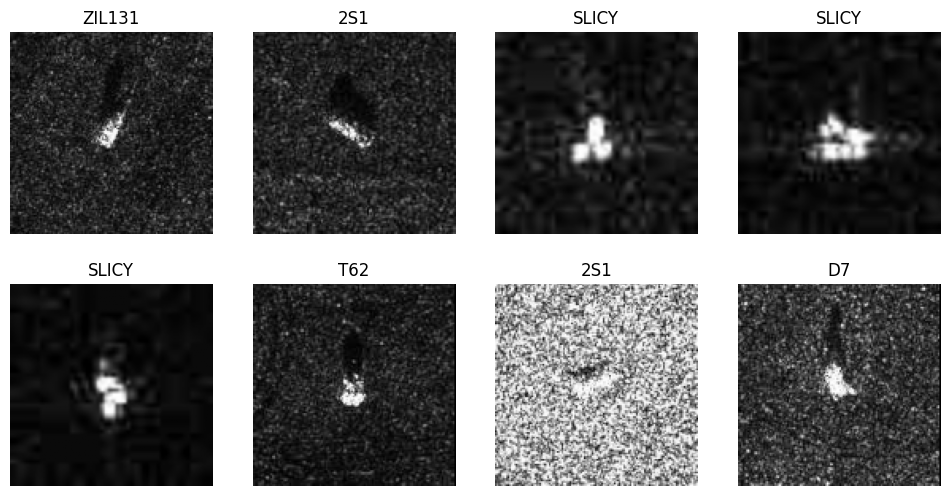

In [6]:
def plot_samples(X, y, classes, num_samples=8):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(2, 4, i + 1)
        plt.imshow(X[idx].squeeze(), cmap="gray")
        plt.title(classes[y[idx]])
        plt.axis("off")
    plt.show()

plot_samples(X, y, classes)


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y = to_categorical(y, num_classes=len(classes))

# Split dataset (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"📌 Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}")


📌 Train Shape: (7572, 128, 128, 1), Validation Shape: (947, 128, 128, 1), Test Shape: (947, 128, 128, 1)


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Updated Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

# Validation and Test Generators (No augmentation, just normalization)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create augmented training generator
train_generator = train_datagen.flow(X_train, y_train, batch_size=16)  # Reduce batch size
val_generator = val_datagen.flow(X_val, y_val, batch_size=16)
test_generator = test_datagen.flow(X_test, y_test, batch_size=16, shuffle=False)

print("✅ Stronger data augmentation with normalization applied.")


✅ Stronger data augmentation with normalization applied.


✅ Found 8 classes: ['2S1', 'BRDM_2', 'BTR_60', 'D7', 'SLICY', 'T62', 'ZIL131', 'ZSU_23_4']
✅ Dataset Loaded: (9466, 128, 128, 1), Labels: (9466,)
✅ Train: (7572, 128, 128, 1), Validation: (947, 128, 128, 1), Test: (947, 128, 128, 1)
✅ Labels One-Hot Encoded: (7572, 8), (947, 8), (947, 8)
✅ Computed Class Weights: {0: 1.0166487647690656, 1: 0.8361307420494699, 2: 0.8747689463955638, 3: 2.066593886462882, 4: 0.9315944881889764, 5: 1.0344262295081967, 6: 1.0321701199563795, 7: 0.844335414808207}
✅ Data Generators Ready!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,486,024 (32.37 MB)

 Trainable params: 8,485,064 (32.37 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


473/473 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.6087 - loss: 1.5403 - val_accuracy: 0.1510 - val_loss: 5.7106
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9387 - loss: 0.6933 - val_accuracy: 0.6463 - val_loss: 1.9721
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9692 - loss: 0.6129 - val_accuracy: 0.8838 - val_loss: 0.8598
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9778 - loss: 0.5452 - val_accuracy: 0.8912 - val_loss: 0.7718
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9784 - loss: 0.5349 - val_accuracy: 0.9166 - val_loss: 0.6865
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9865 - loss: 0.5019 - val_accuracy: 0.8617 - val_loss: 0.9543
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9855 - loss: 0.4882 - val_accuracy: 0.9725 - val_loss: 0.5052
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9851 - loss: 0.4935 - val_accuracy: 0

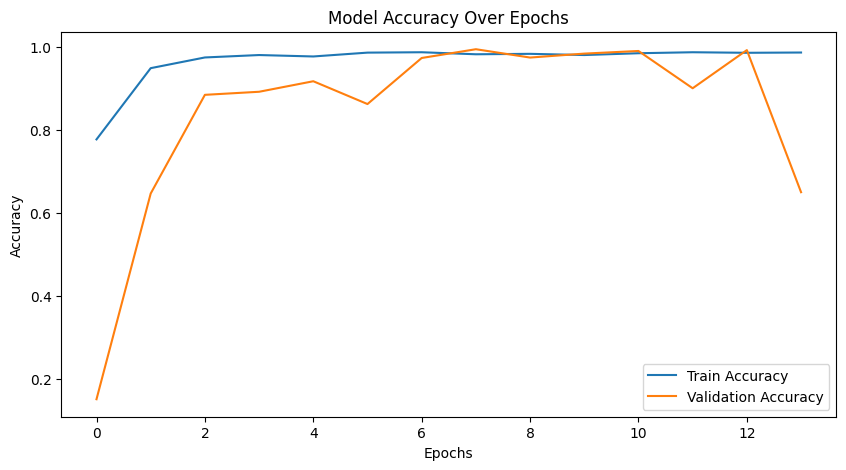

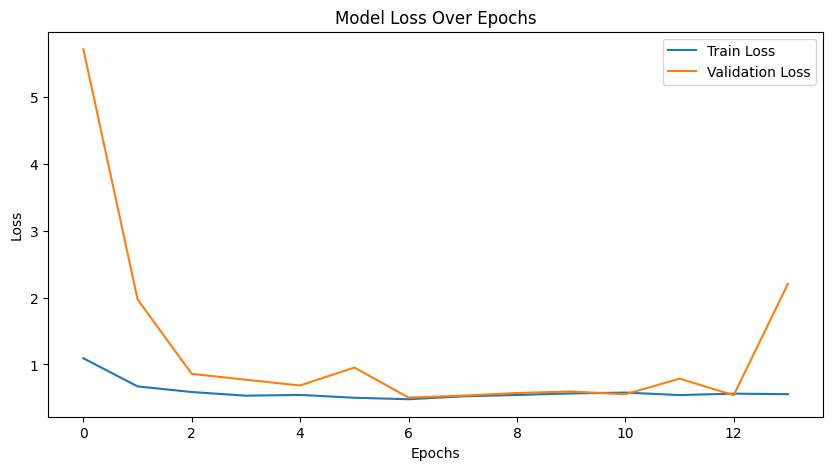

In [12]:
# ✅ Import Necessary Libraries
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import Sequence

# ✅ **Step 1: Load Dataset and Preprocess**
DATASET_PATH = "/root/.cache/kagglehub/datasets/atreyamajumdar/mstar-dataset-8-classes/versions/1/Padded_imgs"
classes = sorted(os.listdir(DATASET_PATH))
num_classes = len(classes)
print(f"✅ Found {num_classes} classes: {classes}")

IMG_SIZE = (128, 128)

X, y = [], []
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(DATASET_PATH, class_name)
    image_paths = glob.glob(class_path + "/*.JPG")
    if not image_paths:
        print(f"⚠️ Warning: No images found in {class_path}")
        continue
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, IMG_SIZE)
        X.append(img)
        y.append(class_idx)

X = np.array(X) / 255.0
X = X.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
y = np.array(y)
print(f"✅ Dataset Loaded: {X.shape}, Labels: {y.shape}")

# ✅ **Step 2: Split Dataset**
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
print(f"✅ Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# ✅ **Step 3: One-Hot Encode Labels**
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
print(f"✅ Labels One-Hot Encoded: {y_train.shape}, {y_val.shape}, {y_test.shape}")

# ✅ **Step 4: Compute Class Weights to Handle Imbalance**
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))
print("✅ Computed Class Weights:", class_weights_dict)

# ✅ **Step 5: Data Augmentation with Stronger Transformations**
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.2
)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

batch_size = 16

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
print("✅ Data Generators Ready!")

# ✅ **Step 6: Define Balanced Data Generator**
class BalancedDataGenerator(Sequence):
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.indices = np.arange(len(X))

    def __len__(self):
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        return self.X[batch_indices], self.y[batch_indices]

    def on_epoch_end(self):
        np.random.shuffle(self.indices)

# ✅ Use Balanced Data Generator
train_generator = BalancedDataGenerator(X_train, y_train, batch_size=batch_size)

# ✅ **Step 7: Improved Learning Rate Schedule (Cosine Decay)**
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.0005,
    decay_steps=50000,
    alpha=0.0001
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# ✅ **Step 8: Define CNN Model with Stronger Regularization**
def improved_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (5, 5), padding='same', kernel_regularizer=l2(0.0005), input_shape=input_shape),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(256, kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])
    return model

# ✅ **Step 9: Initialize Model**
input_shape = (128, 128, 1)
model = improved_cnn(input_shape, num_classes)

# ✅ **Step 10: Compile Model**
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ✅ **Step 11: Train Model with Class Weights**
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=batch_size,
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# ✅ **Step 12: Evaluate Model**
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Final Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ✅ **Step 13: Save Model**
model.save("mstar_cnn_model.keras")
print("🎯 Model training completed and saved successfully!")

# ✅ **Step 14: Plot Training Curves**
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


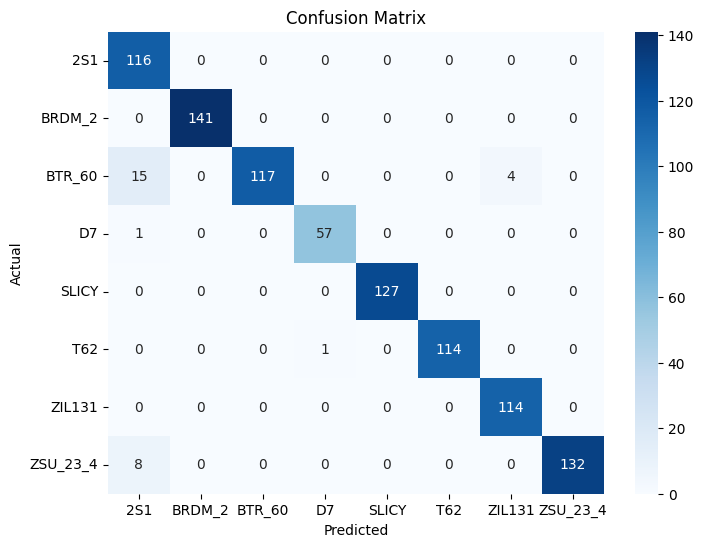

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       116
           1       1.00      1.00      1.00       141
           2       1.00      0.86      0.92       136
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00       127
           5       1.00      0.99      1.00       115
           6       0.97      1.00      0.98       114
           7       1.00      0.94      0.97       140

    accuracy                           0.97       947
   macro avg       0.97      0.97      0.97       947
weighted avg       0.97      0.97      0.97       947



In [13]:
# ✅ Generate Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# ✅ Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# ✅ Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Print Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


In [25]:
import cv2
import numpy as np

def predict_new_image(image_path):
    # Check if file exists
    if not os.path.exists(image_path):
        print(f"❌ Error: File '{image_path}' not found!")
        return

    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded correctly
    if img is None:
        print(f"❌ Error: Unable to load image at '{image_path}'")
        return

    # Resize and normalize
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = img.reshape(1, 128, 128, 1)  # Reshape for model input

    # Predict Class
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    print(f"✅ Predicted Class: {classes[predicted_class]} (Confidence: {np.max(prediction)*100:.2f}%)")

# Example usage:
predict_new_image("/content/2sl.png")  # Update with the correct path


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
✅ Predicted Class: SLICY (Confidence: 100.00%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


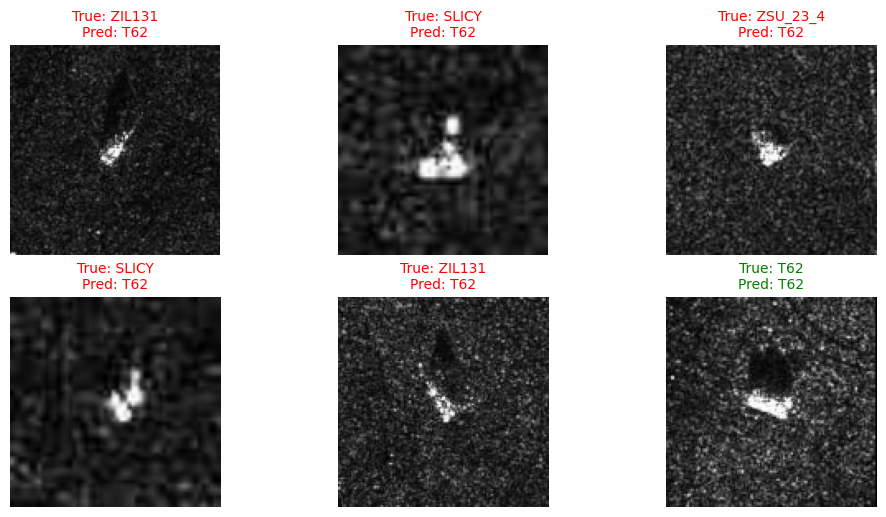

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Get some test samples
test_images, test_labels = next(iter(test_generator))
predictions = improved_cnn_model.predict(test_images)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Display some test images with predictions
def plot_predictions(images, true_labels, predicted_labels, class_names, num_samples=6):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        true_label = class_names[true_labels[i]]
        pred_label = class_names[predicted_labels[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10, color="green" if true_label == pred_label else "red")
        plt.axis("off")
    plt.show()

plot_predictions(test_images, true_classes, predicted_classes, classes)


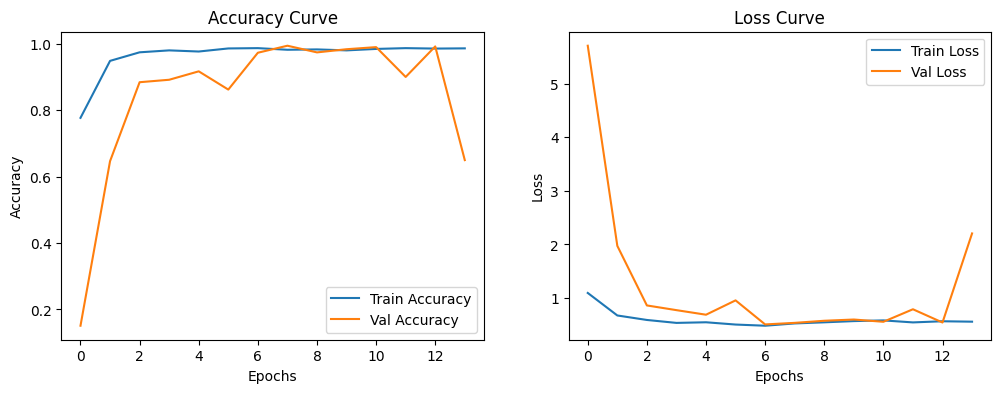

In [30]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


mobilenet

vgg

🔥 Using device: cuda
✅ Dataset path dynamically detected: C:\Users\hp omen 4 pro\.cache\kagglehub\datasets\atreyamajumdar\mstar-dataset-8-classes\versions\1\Padded_imgs
✅ Found 8 classes: ['2S1', 'BRDM_2', 'BTR_60', 'D7', 'SLICY', 'T62', 'ZIL131', 'ZSU_23_4']
✅ Dataset Loaded: (9466, 128, 128, 3), Labels: (9466,)
✅ Data Generators Ready!
58889256/58889256 [==============================] - 27s 0us/step
Epoch 1/20
474/474 [==============================] - 580s 1s/step - loss: 1.3601 - accuracy: 0.4925 - val_loss: 1.2033 - val_accuracy: 0.5153
Epoch 2/20
474/474 [==============================] - 582s 1s/step - loss: 1.0706 - accuracy: 0.5924 - val_loss: 1.3769 - val_accuracy: 0.4762
Epoch 3/20
474/474 [==============================] - 581s 1s/step - loss: 0.9949 - accuracy: 0.6158 - val_loss: 1.1266 - val_accuracy: 0.5322
Epoch 4/20
474/474 [==============================] - 581s 1s/step - loss: 0.9331 - accuracy: 0.6471 - val_loss: 1.2240 - val_accuracy: 0.5385
Epoch 5/20
474/474 [==

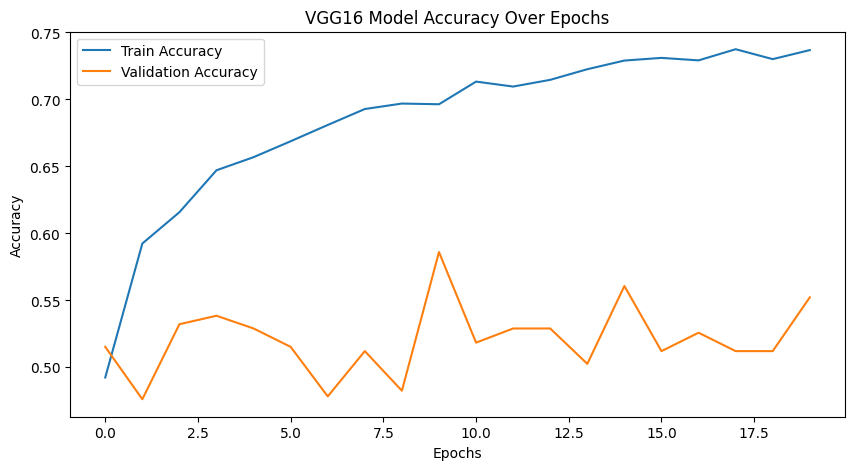

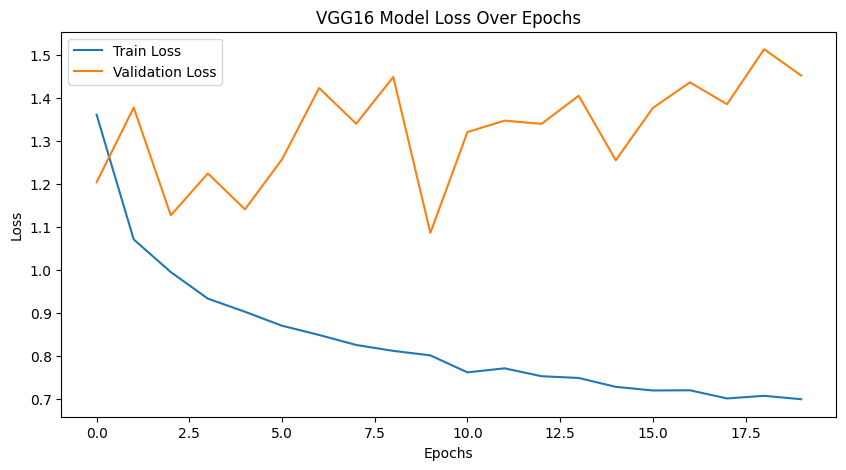

In [31]:
# ✅ Import Necessary Libraries
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

# ✅ Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Using device: {device}")

# ✅ Dynamically Detect Dataset Path
home_dir = os.path.expanduser("~")
base_path = os.path.join(home_dir, ".cache", "kagglehub", "datasets", "atreyamajumdar", "mstar-dataset-8-classes")

# Ensure correct dataset version
if "versions" in os.listdir(base_path):
    DATASET_PATH = os.path.join(base_path, "versions", "1", "Padded_imgs")
else:
    DATASET_PATH = os.path.join(base_path, "Padded_imgs")  # Fallback

# Verify dataset path
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"❌ Dataset path does not exist: {DATASET_PATH}")

print(f"✅ Dataset path dynamically detected: {DATASET_PATH}")
# ✅ Get class names
classes = sorted(os.listdir(DATASET_PATH))
num_classes = len(classes)
print(f"✅ Found {num_classes} classes: {classes}")

# ✅ Define image size
IMG_SIZE = (128, 128)

# ✅ Load images and labels
X, y = [], []
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(DATASET_PATH, class_name)
    image_paths = glob.glob(class_path + "/*.JPG")

    if not image_paths:
        print(f"⚠️ Warning: No images found in {class_path}")
        continue

    for img_path in image_paths:
        img = cv2.imread(img_path)  # Read in BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, IMG_SIZE)  # Resize
        X.append(img)
        y.append(class_idx)

# ✅ Convert lists to NumPy arrays
X = np.array(X, dtype=np.float32) / 255.0  # Normalize
y = np.array(y)
print(f"✅ Dataset Loaded: {X.shape}, Labels: {y.shape}")

# ✅ Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# ✅ One-hot encode labels for VGG16
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# ✅ Apply Data Augmentation for Robust Generalization
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train_cat, batch_size=16)
val_generator = val_datagen.flow(X_val, y_val_cat, batch_size=16)
test_generator = test_datagen.flow(X_test, y_test_cat, batch_size=16, shuffle=False)

print("✅ Data Generators Ready!")

# ✅ Load Pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze layers for feature extraction

# ✅ Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(num_classes, activation='softmax')(x)

# ✅ Create VGG16 model
vgg_model = Model(inputs=base_model.input, outputs=out)

# ✅ Define Adaptive Learning Rate Scheduler
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True
)

# ✅ Compile Model
vgg_model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Train VGG16 model with Augmented Data
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=16
)

# ✅ Evaluate VGG16 Model
loss, accuracy = vgg_model.evaluate(test_generator)
print(f"✅ VGG16 Model Accuracy: {accuracy:.4f}")

# ✅ Save Model
vgg_model.save("mstar_vgg16.keras")
print("🎯 Model training completed and saved successfully!")

# ✅ **Plot Training Curves**
plt.figure(figsize=(10,5))
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('VGG16 Model Accuracy Over Epochs')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('VGG16 Model Loss Over Epochs')
plt.show()


hybrid